In [1]:
from keras.models import load_model
import cv2
from skimage import filters
from skimage import feature
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
best=load_model("best_result.h5")

In [8]:
image_order=6

In [9]:
def calculateDistance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def calculateIdealLowPassFilter(D0,imgShape):
    lowPassScpectrum = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if calculateDistance((y,x),center) < D0:
                lowPassScpectrum[y,x] = 1
    return lowPassScpectrum

def low_pass(img):   
  
    original = np.fft.fft2(img)
    center = np.fft.fftshift(original)
    LowPassCenter =  center * calculateIdealLowPassFilter(30,img.shape)

    LowPass = np.fft.ifftshift(LowPassCenter)
    inverse_LowPass = np.fft.ifft2(LowPass)   

    return np.abs(inverse_LowPass)

In [10]:
test_x2=cv2.imread("Test_Images/M"+str(image_order)+".jpeg") 
test_x=cv2.imread("Test_Images/C"+str(image_order)+".jpeg") 



#Test images
test_x = cv2.cvtColor(test_x, cv2.COLOR_BGR2GRAY)
test_x2 = cv2.cvtColor(test_x2, cv2.COLOR_BGR2GRAY)

#Feature Extraction 1
feature1_mr = filters.sobel(test_x2).reshape(-1,1)
feature1_ct=filters.sobel(test_x).reshape(-1,1)

#Feature Extraction 2
feature2_mr = feature.canny(test_x2).reshape(-1,1)
feature2_ct=feature.canny(test_x).reshape(-1,1)

#Feature3 Low Pass Filter
feature3_mr=low_pass(test_x2).reshape(-1,1)
feature3_ct=low_pass(test_x).reshape(-1,1)

test_x = test_x.reshape(-1,1)
test_x2 = test_x2.reshape(-1,1)

  



#(ct_images, mr_images,edge_sobel_mr,edge_sobel_ct)
test=np.concatenate((test_x, test_x2,feature1_mr,feature1_ct,feature2_mr,feature2_ct,feature3_mr,feature3_ct), axis=1)

#test_result=plt.imread("RESULT/"+str(image_order)+".tif")   
#test_result = cv2.cvtColor(test_result, cv2.COLOR_BGR2GRAY).reshape(-1,1)

In [11]:
y_pred=best.predict(test)
y_pred.shape

(262144, 1)

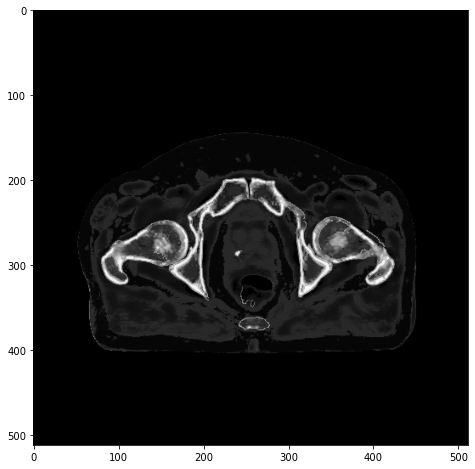

In [12]:
import math
size=int(math.sqrt(len(y_pred)))

plt.figure(figsize=(8,8))
plt.imshow(y_pred.reshape(size,size),cmap="gray")
plt.show()